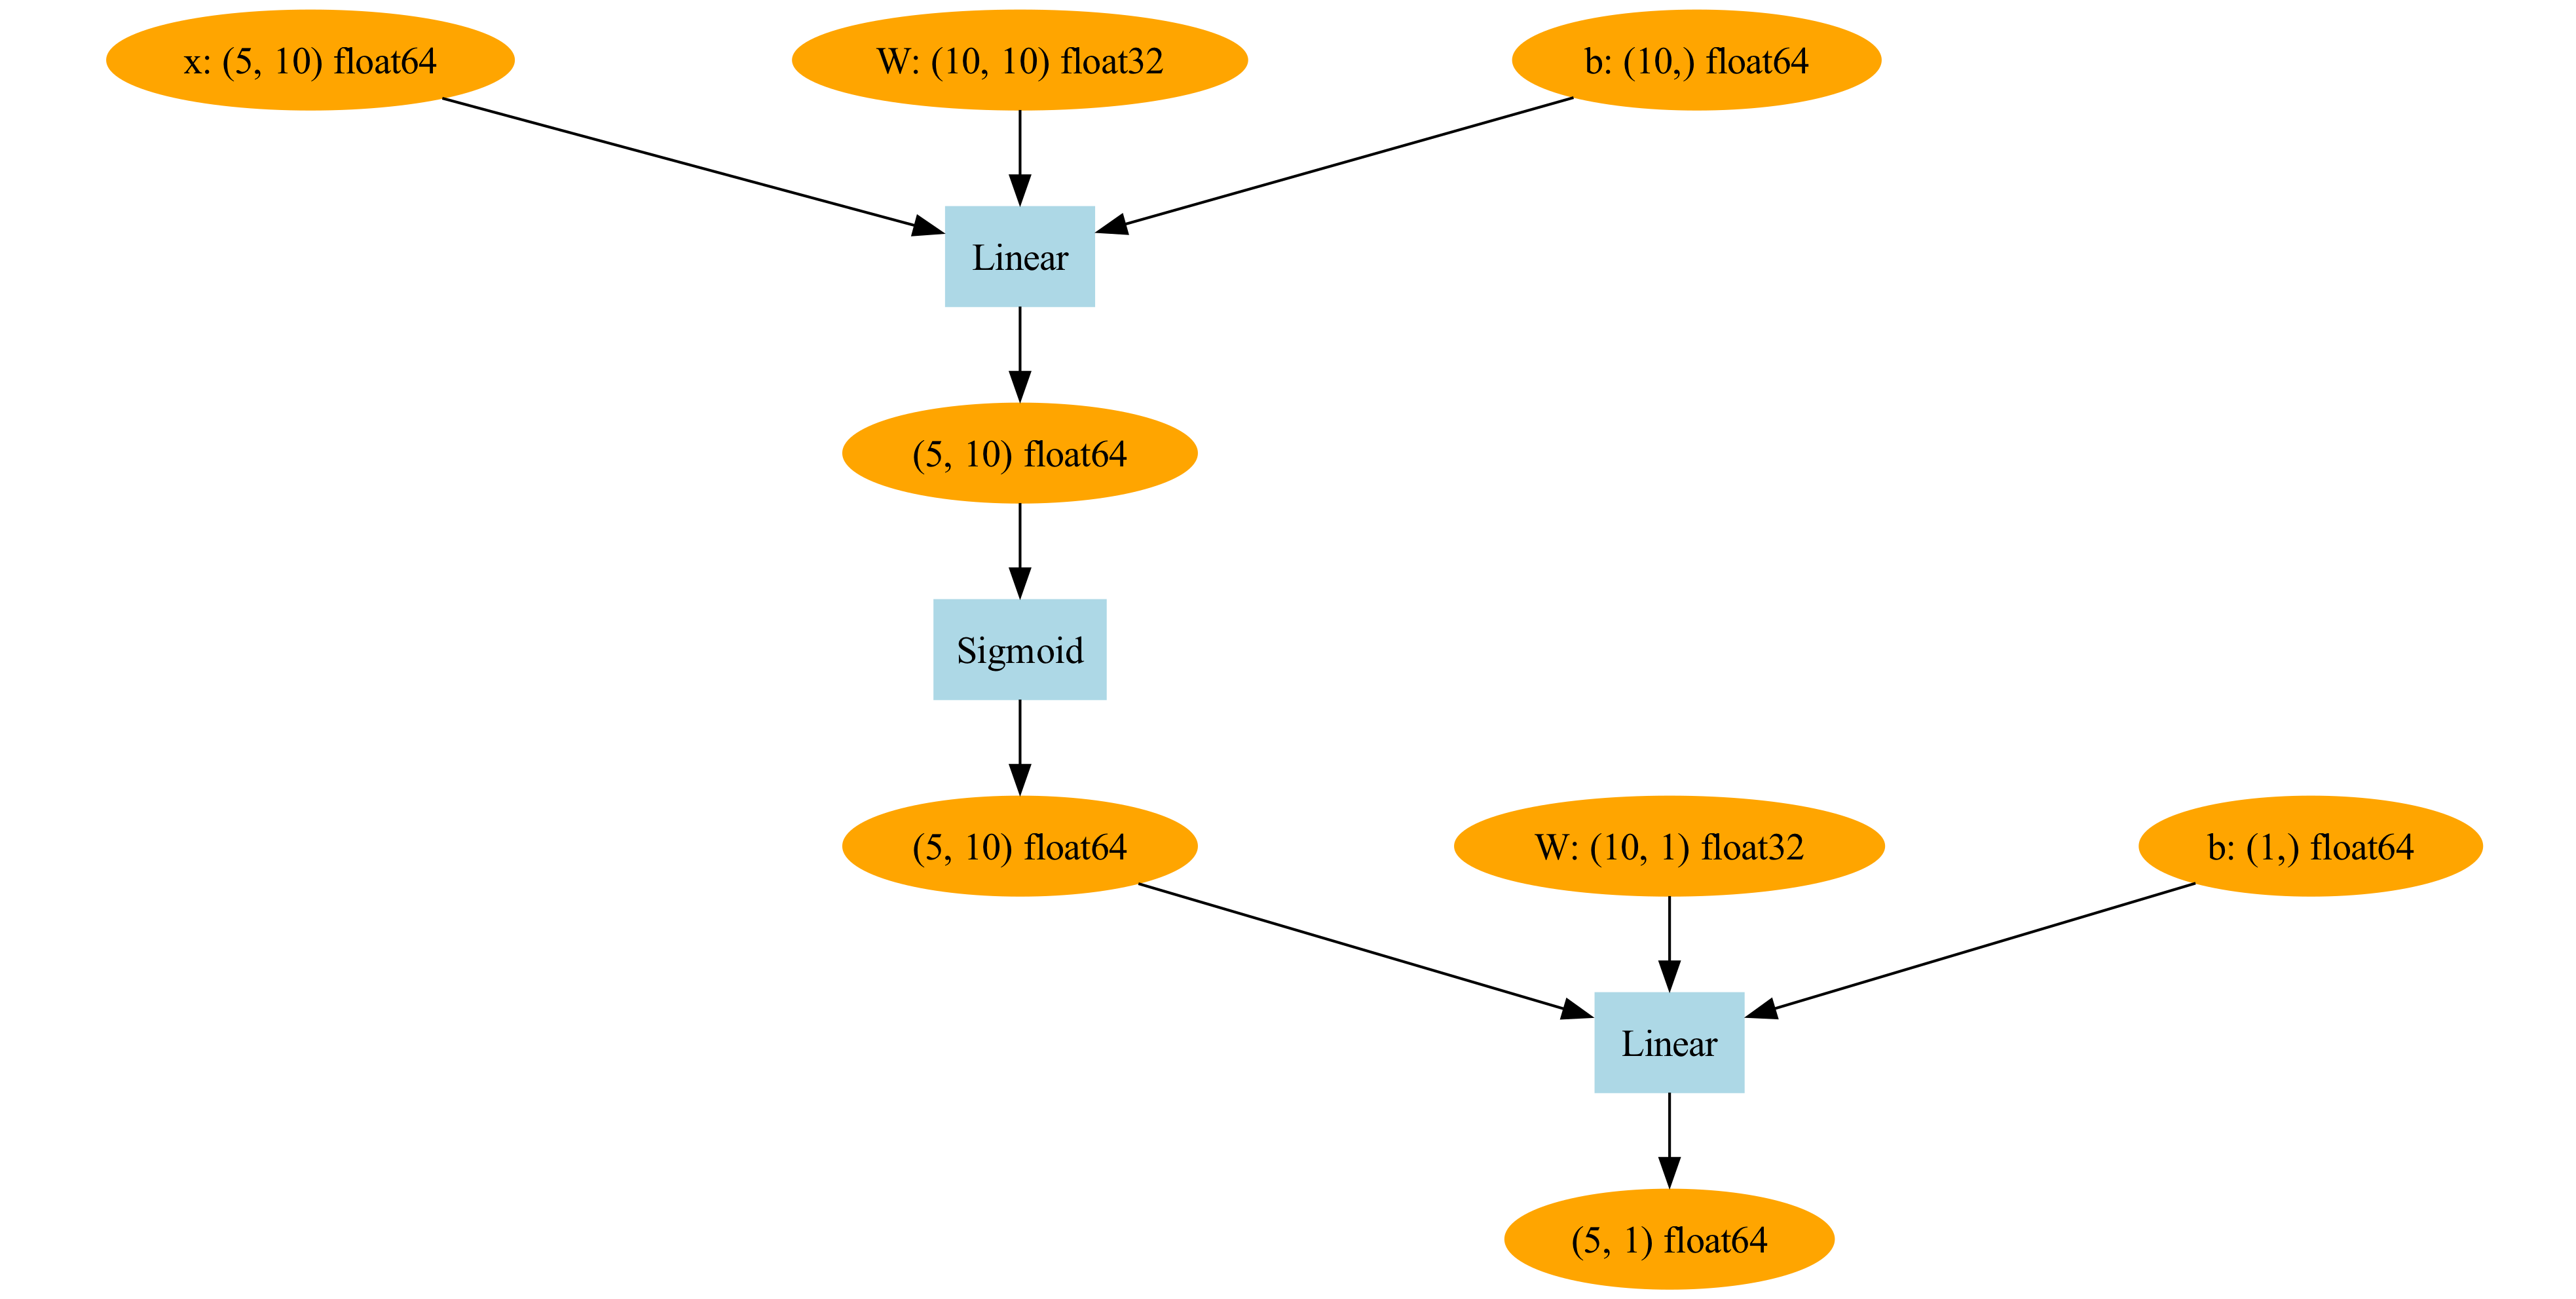

In [1]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F
from dezero.models import MLP

# class TwoLayerNet(Model):
#     def __init__(self, hidden_size, output_size):
#         super().__init__()
#         self.l1 = L.Linear(hidden_size)
#         self.l2 = L.Linear(output_size)
#         
#     def forward(self, x):
#         y = F.sigmoid(self.l1(x))
#         y = self.l2(y)
#         return y
#     
x = Variable(np.random.randn(5, 10), name='x')
# model = TwoLayerNet(10, 10)
model = MLP((10, 1))
model.plot(x)

In [2]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

hidden_size = 10
lr = 0.1
iter_num = 1000

x = np.linspace(-6.0, 6.0, 1000).reshape(-1, 1)
y = np.sin(x) + np.random.randn(1000, 1)

In [3]:
x

array([[-6.        ],
       [-5.98798799],
       [-5.97597598],
       [-5.96396396],
       [-5.95195195],
       [-5.93993994],
       [-5.92792793],
       [-5.91591592],
       [-5.9039039 ],
       [-5.89189189],
       [-5.87987988],
       [-5.86786787],
       [-5.85585586],
       [-5.84384384],
       [-5.83183183],
       [-5.81981982],
       [-5.80780781],
       [-5.7957958 ],
       [-5.78378378],
       [-5.77177177],
       [-5.75975976],
       [-5.74774775],
       [-5.73573574],
       [-5.72372372],
       [-5.71171171],
       [-5.6996997 ],
       [-5.68768769],
       [-5.67567568],
       [-5.66366366],
       [-5.65165165],
       [-5.63963964],
       [-5.62762763],
       [-5.61561562],
       [-5.6036036 ],
       [-5.59159159],
       [-5.57957958],
       [-5.56756757],
       [-5.55555556],
       [-5.54354354],
       [-5.53153153],
       [-5.51951952],
       [-5.50750751],
       [-5.4954955 ],
       [-5.48348348],
       [-5.47147147],
       [-5

In [4]:
y[:5]

array([[ 0.20834232],
       [ 0.71251842],
       [ 0.23521906],
       [ 1.20511584],
       [-0.69300166]])

In [5]:
np.random.randn(1, 1000).shape

(1, 1000)

In [6]:
np.random.randn(1000, 1).shape

(1000, 1)

In [7]:
class TwoLayerNet(Model):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(output_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
    
model = TwoLayerNet(hidden_size, 1)
train_losses = []

for i in range(iter_num):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    loss.backward()
    for param in model.params():
        param.data = param.data - lr * param.grad.data
    model.cleargrads()
    
    if i % 10:
        print(loss.data)
        train_losses.append(loss.data)


1.4683093979670567
1.4644861533040747
1.462306567302954
1.4602782878994107
1.4582751046067526
1.4562858966117702
1.4543092506157864
1.4523445888032476
1.4503914211893763
1.4465177224165855
1.444596312003062
1.4426846359134504
1.4407822958325927
1.438888909538499
1.4370041107312814
1.4351275488689006
1.4332588889970217
1.4313978115650479
1.4276972016006166
1.4258571050554418
1.4240234624097825
1.4221960276569412
1.42037456864975
1.4185588667686997
1.4167487165717971
1.4149439254278642
1.4131443131351134
1.4095599640665433
1.4077749254332586
1.4059944611009405
1.4042184469118444
1.4024467686468929
1.4006793215943856
1.398916010118794
1.3971567472312194
1.3954014541630095
1.3919025009861494
1.3901587206752872
1.3884186689694893
1.3866823020076002
1.3849495817272304
1.383220475493497
1.3814949557390854
1.3797729996162007
1.3780545886608653
1.3746283483912443
1.372920501226747
1.3712161629493884
1.3695153324332048
1.3678180111970129
1.3661242031615433
1.3644339144199347
1.3627471530214568
1

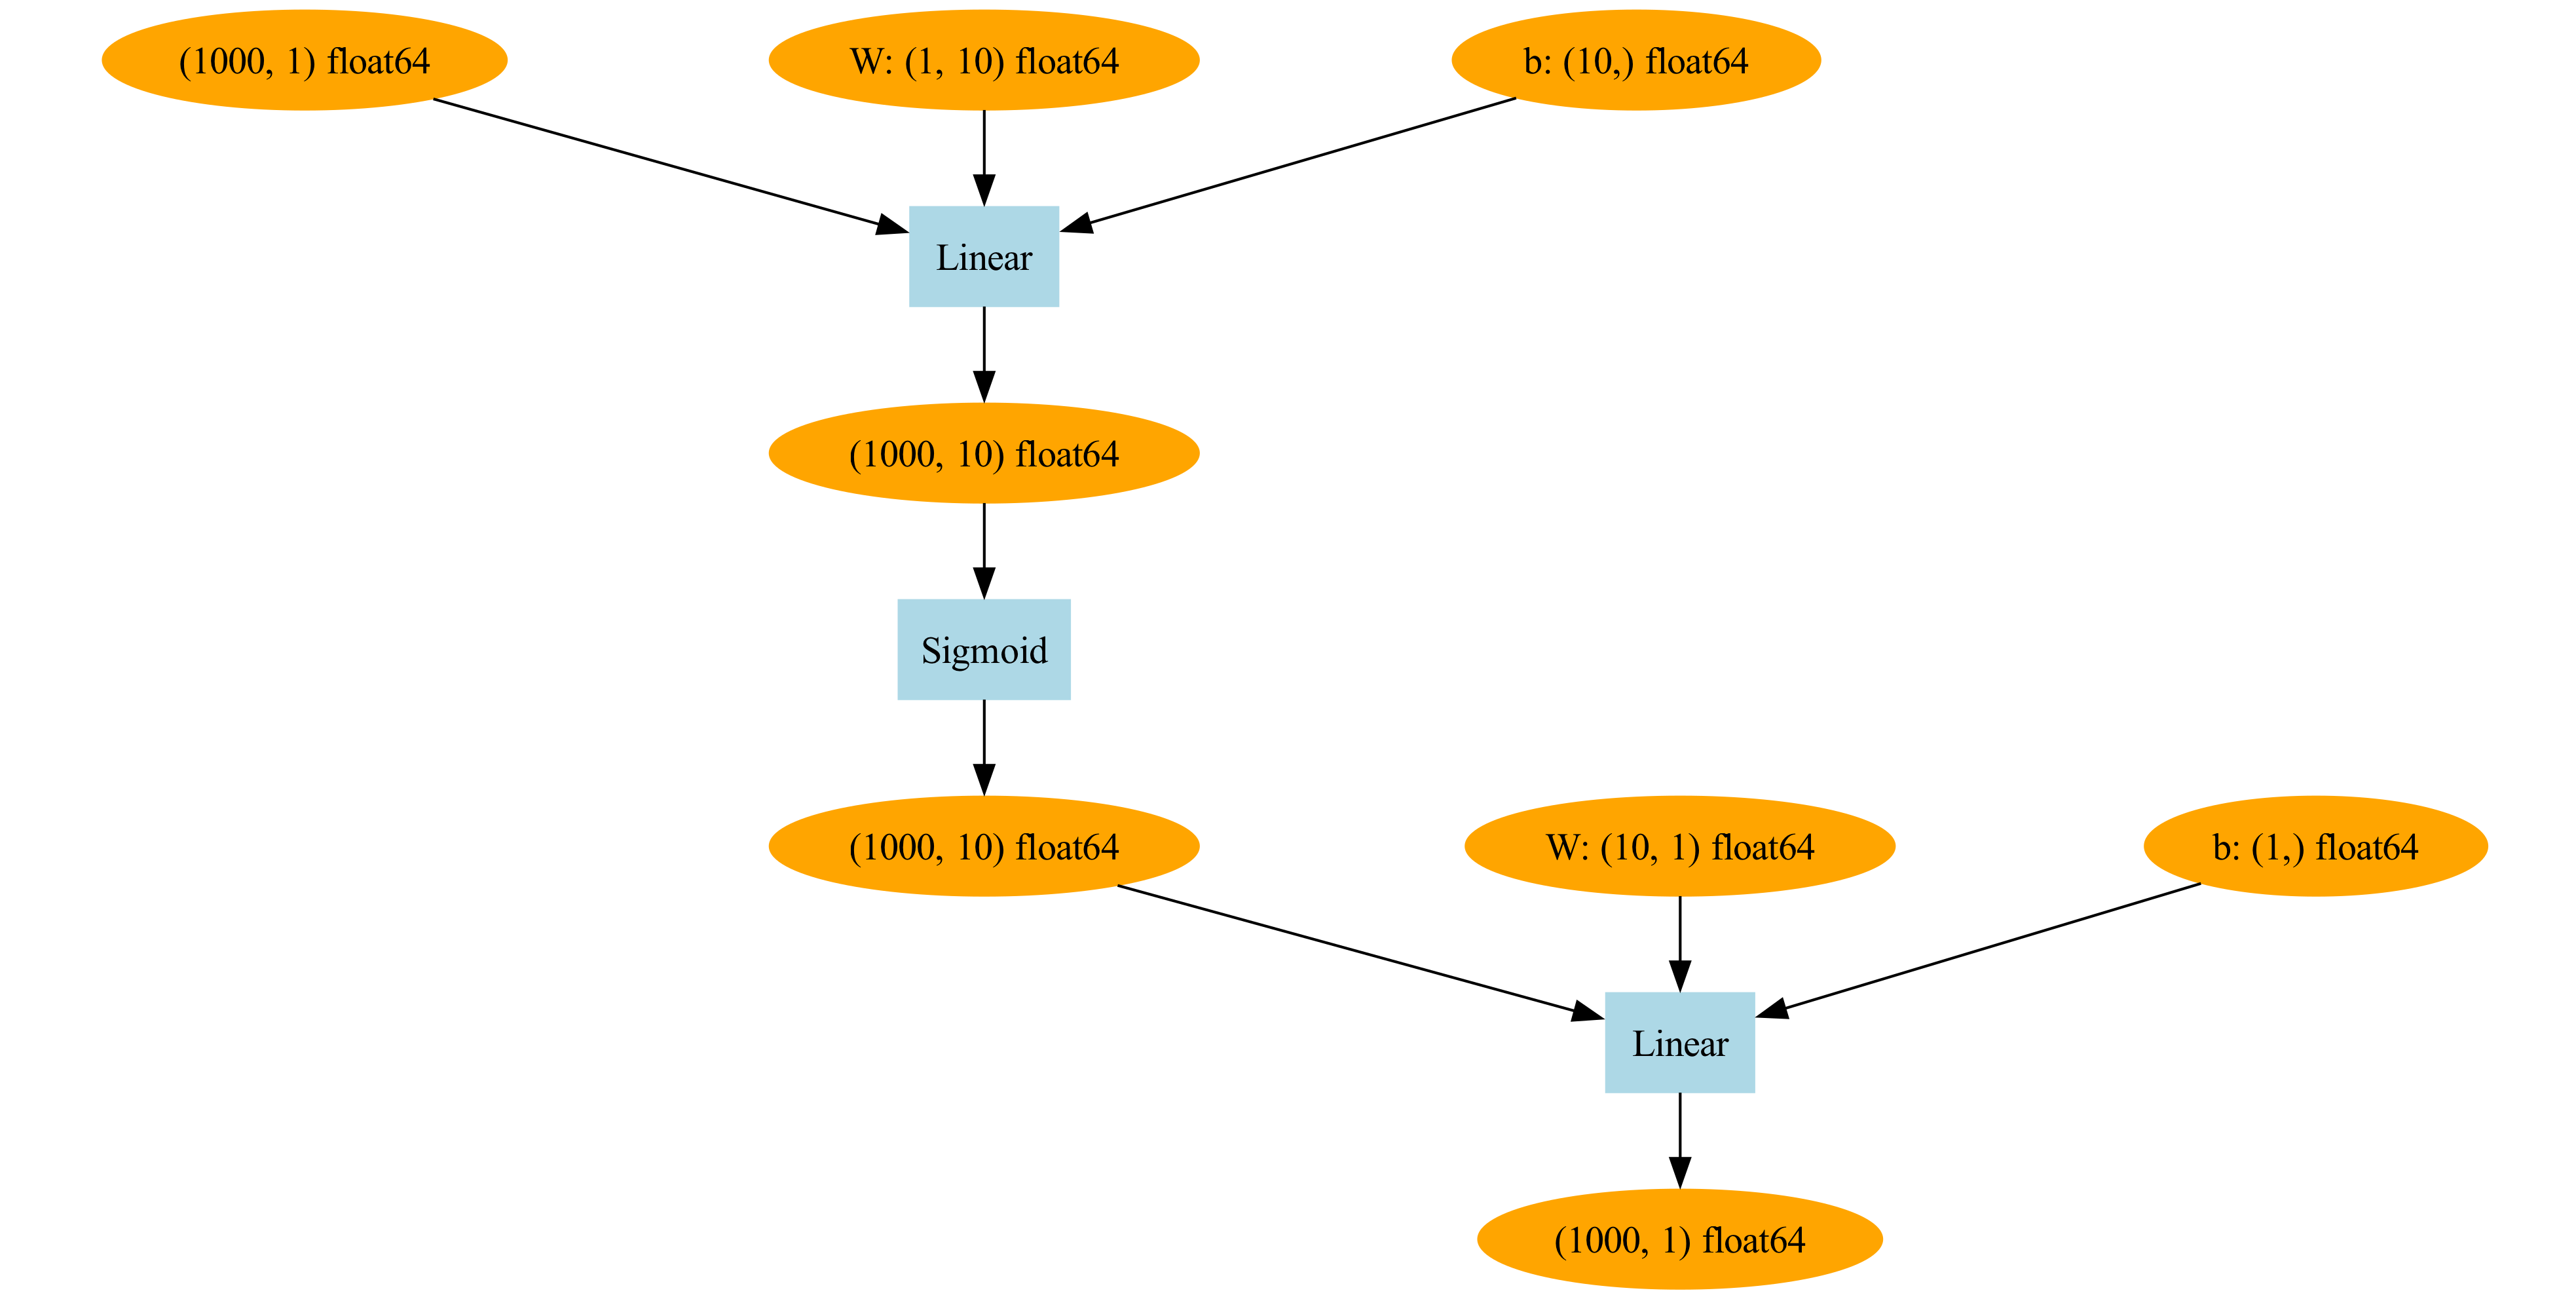

In [8]:
model.plot(x)

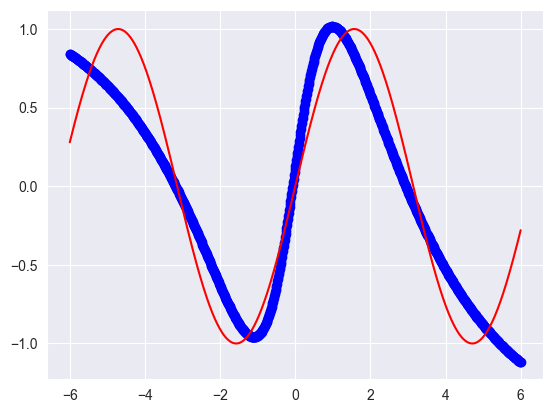

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

y_pred = model(x)

plt.scatter(x, y_pred.data, c='b')
plt.plot(x, np.sin(x), c='r')

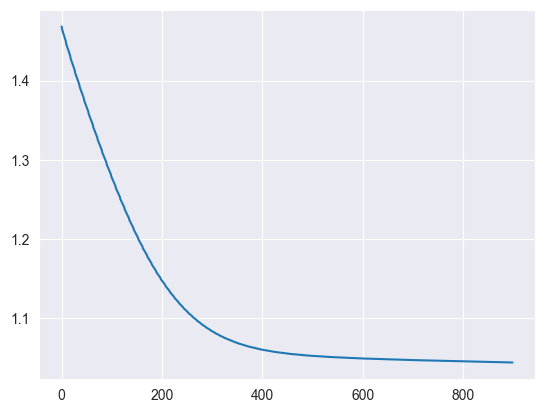

In [10]:
plt.plot(train_losses)